In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_dataset=pd.read_csv(r"C:\Users\pc\Desktop\Data Science Assignments\Naive Bayes\SalaryData_Train.csv")
test_dataset=pd.read_csv(r"C:\Users\pc\Desktop\Data Science Assignments\Naive Bayes\SalaryData_Test.csv")

In [3]:
train_dataset

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


# Encoding the dataset

In [5]:
from sklearn import preprocessing

In [8]:
l=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
dftrain=train_dataset.copy()
dftest=test_dataset.copy()
label_encoder=preprocessing.LabelEncoder()
for i in l:
    dftrain[i]=label_encoder.fit_transform(dftrain[i])
    dftest[i]=label_encoder.fit_transform(dftest[i])

In [9]:
dftrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


# Model Building

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
model=GaussianNB()

In [24]:
x = dftrain.iloc[:,:-1]
y=dftrain['Salary']

In [26]:
a = dftest.iloc[:,:-1]
b = dftest['Salary']

In [27]:
model.fit(x,y)

GaussianNB()

In [28]:
prdct=model.predict(a)

In [29]:
prdct_df=pd.DataFrame({'prdct':prdct,'b':b})
prdct_df

,prdct,b
0,0,0
1,0,0
2,0,1
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,0
15058,1,0


In [31]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [32]:
def report(model):
    print(classification_report(b,prdct))
    plot_confusion_matrix(model,x,y)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



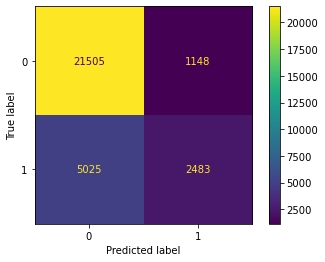

In [33]:
report(model)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prdct,b)

In [35]:
print("acuracy score------->",accuracy)

acuracy score-------> 0.7946879150066402
